In [51]:
#Loading the tiktok class and few libraries for data crunching and visualization
from tiktok_interface import Tiktok_I_IH
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress

In [34]:
#Initialize the TikTok fetcher:

##Replace this with your token! 
##Get one for free at www.influencerhunters.com
TOKEN = "XXXXXXXXXX"

tt = Tiktok_I_IH(token_IH_API=TOKEN)

In [35]:
#Fetch the latest posts of a user (given its username). 
# We set a high depth parameter so to get a good history overview.

username = "charlidamelio"
res, success = tt.get_user_posts(username=username, depth=10, oldest_createtime=1548151857)

if success:
    print("fetched the last",len(res),"posts")
else:
    print("Something went wrong with the request: ", res.text)

fetched the last 100 posts


In [36]:
#Get the views counts from all the videos (in chronological order):
play_count = [video["statistics"]["play_count"] for video in res]
print(play_count)

[11375849, 13168264, 18516418, 14932435, 20881995, 11969521, 12668239, 10409033, 13782478, 13514455, 8706226, 14785525, 10519805, 7708574, 10239481, 18249891, 54524032, 17606009, 24995453, 15146537, 13371652, 13345735, 12922590, 14818704, 19252453, 12798213, 16116876, 14586568, 26626934, 12437039, 22319154, 16387576, 19758324, 15475267, 20175101, 14420973, 11843375, 15834479, 11903337, 12144200, 12575564, 16754154, 23576833, 27230062, 13845425, 11332759, 15765665, 23573170, 19564361, 38877743, 36808400, 32684029, 20070633, 15459141, 22713094, 21292513, 23164997, 33210252, 20100660, 28371910, 21934596, 28583020, 18920249, 36468772, 33110000, 27738902, 32350564, 30147763, 33554197, 24671728, 28948881, 23304300, 26330087, 35347971, 34512280, 40888901, 58604441, 51429209, 32683312, 24231968, 37374197, 29806489, 22371436, 27423305, 23309009, 38150642, 31374614, 47990131, 31379468, 28748442, 77100895, 30711945, 47117597, 72733645, 55722034, 82248651, 44622480, 40631825, 47865543, 45371657]


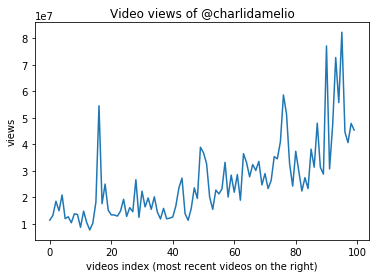

In [37]:
#Plotting it with matplotlib:

plt.plot(play_count)
 
plt.xlabel('videos index (most recent videos on the right)')
plt.ylabel('views')
 
plt.title('Video views of @'+username)
 
# function to show the plot
plt.show()

Two interesting things to notice:
* The general trend is an (overall stable) increase of views
* But on a micro level, there is a lot of variance: some videos get viral and explode while other are probaly just watched by the user's followers

How about engagement? Does that also increase? <br>
We calculate the engagement as the sum of likes, comments, shares and downloads, divided by the views:

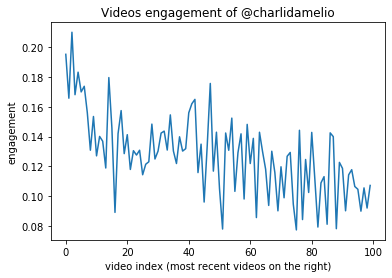

In [38]:
#Getting these information is as straightforward as before:
comment_count = [video["statistics"]["comment_count"] for video in res]
share_count = [video["statistics"]["share_count"] for video in res]
download_count = [video["statistics"]["download_count"] for video in res]
likes_count = [video["statistics"]["digg_count"] for video in res]
engagement = [(c+s+d+l)/v for c,s,d,l,v in zip(comment_count,share_count,download_count,likes_count, play_count)]

#Plotting it:

plt.plot(engagement)
 
plt.xlabel('video index (most recent videos on the right)')
plt.ylabel('engagement')
 
plt.title('Videos engagement of @'+username)
 
# function to show the plot
plt.show()

The engagement actually decreases, from 0.2 to 0.1. Meaning roughly 20-10% of viewers have interacted with the video.<br>
However, if you have a broader outlook on these metrics across TikTok you will see it is actually a common phenomenon at this level of popularity. <br>In fact, 10% engagement is higher than average. 
<br>
<br>
<br>
The great thing about the fetched data is that it has all the (public) information avaiable. <br>
For example, let's say we want to delve a little bit more into the user's post to understand its posting strategy. Does the user uses a lot of hashtag? And does it get more views when it does ?

Out of 100 videos, there are 28 with hashtag


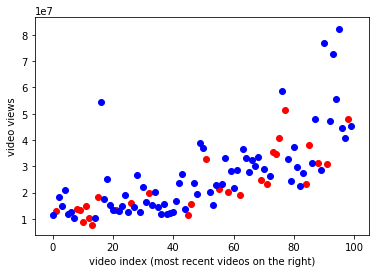

In [49]:
#Count how many posts have an hashtag
#This information can be either extracted from the raw video description, or from the field text_extra
hashtag_videos = []

for video in res : 
    has_hashtag = False
    for te in video["text_extra"]:
        if "hashtag_name" in te : 
            has_hashtag = True
    hashtag_videos.append(has_hashtag)
        
print("Out of",len(res),"videos, there are", sum(hashtag_videos),"with hashtag")

#Plot the videos views, with different color if with hashtag:
indexes = list(range(len(res)))
indexes_hashtag = list(compress(indexes, hashtag_videos)) 
views_hashtag = list(compress(play_count, hashtag_videos)) 

hashtag_n_videos = [not h for h in hashtag_videos]
indexes_n_hashtag = list(compress(indexes, hashtag_n_videos)) 
views_n_hashtag = list(compress(play_count, hashtag_n_videos)) 

plt.scatter(indexes_hashtag,views_hashtag,color='red')
plt.scatter(indexes_n_hashtag,views_n_hashtag,color='blue')

plt.xlabel('video index (most recent videos on the right)')
plt.ylabel('video views')
plt.show()


At a first look, it seems that there hasn't been an increase (or decrease) of hashtag usage recently. Also, 
To visualize the general trend, we perform a simple linear fitting and visualize it on the same plot:

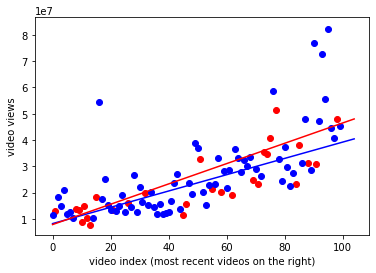

In [61]:
indexes_extended = list(range(len(res)+5))

coef_h = np.polyfit(indexes_hashtag,views_hashtag,1)
poly1d_fn_h = np.poly1d(coef_h) 
est_point_h = poly1d_fn_h(indexes_extended)

coef_nh = np.polyfit(indexes_n_hashtag,views_n_hashtag,1)
poly1d_fn_nh = np.poly1d(coef_nh) 
est_point_nh = poly1d_fn_nh(indexes_extended)

plt.scatter(indexes_hashtag,views_hashtag,color='red')
plt.scatter(indexes_n_hashtag,views_n_hashtag,color='blue')

plt.plot(indexes_extended,est_point_h, color="blue")
plt.plot(indexes_extended,est_point_nh, color="red")

plt.xlabel('video index (most recent videos on the right)')
plt.ylabel('video views')
plt.show()